# Predict diabetes

In [9]:
from sklearn.datasets import load_diabetes
import pandas as pd

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_X = diabetes.data
df_y = diabetes.target
print(df_X)
print(df_y)
print(type(df),type(df_X),type(df_y))

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

## Split train,test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


## Set W,b define model

In [12]:
W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


## Define MSE loss function

In [13]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

## Gradient Function

In [16]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
dW, db = gradient(df_X, W, b, df_y)
print("dW:", dW)
print("db:", db)

dW: [ -60.64317766  -13.77812575 -189.74556623 -142.76582528  -68.37043149
  -56.09325801  127.77133033 -139.15211906 -183.03409119 -123.65474061]
db: -302.8297387938435


## Training

Iteration 10 : Loss 2899.6896
Iteration 20 : Loss 2899.6408
Iteration 30 : Loss 2899.5930
Iteration 40 : Loss 2899.5460
Iteration 50 : Loss 2899.4999
Iteration 60 : Loss 2899.4547
Iteration 70 : Loss 2899.4103
Iteration 80 : Loss 2899.3667
Iteration 90 : Loss 2899.3239
Iteration 100 : Loss 2899.2819
Iteration 110 : Loss 2899.2407
Iteration 120 : Loss 2899.2001
Iteration 130 : Loss 2899.1604
Iteration 140 : Loss 2899.1213
Iteration 150 : Loss 2899.0829
Iteration 160 : Loss 2899.0451
Iteration 170 : Loss 2899.0080
Iteration 180 : Loss 2898.9716
Iteration 190 : Loss 2898.9358
Iteration 200 : Loss 2898.9005
Iteration 210 : Loss 2898.8659
Iteration 220 : Loss 2898.8319
Iteration 230 : Loss 2898.7984
Iteration 240 : Loss 2898.7654
Iteration 250 : Loss 2898.7330
Iteration 260 : Loss 2898.7012
Iteration 270 : Loss 2898.6698
Iteration 280 : Loss 2898.6390
Iteration 290 : Loss 2898.6086
Iteration 300 : Loss 2898.5787
Iteration 310 : Loss 2898.5493
Iteration 320 : Loss 2898.5203
Iteration 330 : L

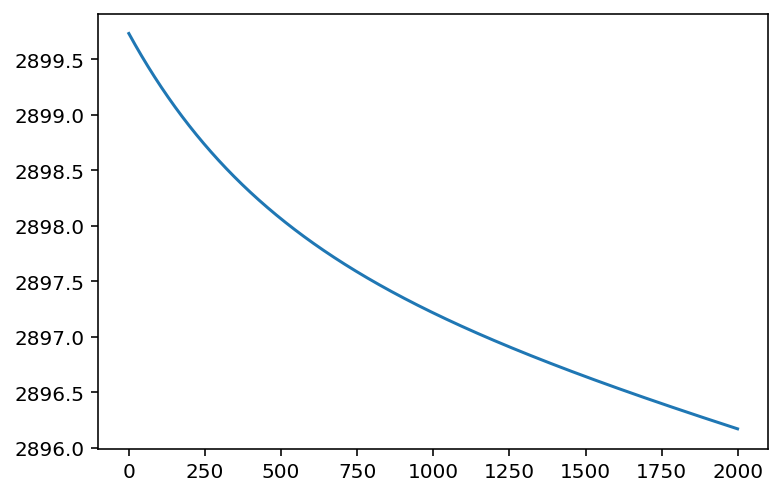

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
LEARNING_RATE = 0.01
losses = []

for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
plt.plot(losses)
plt.show()

In [22]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2884.10972819444

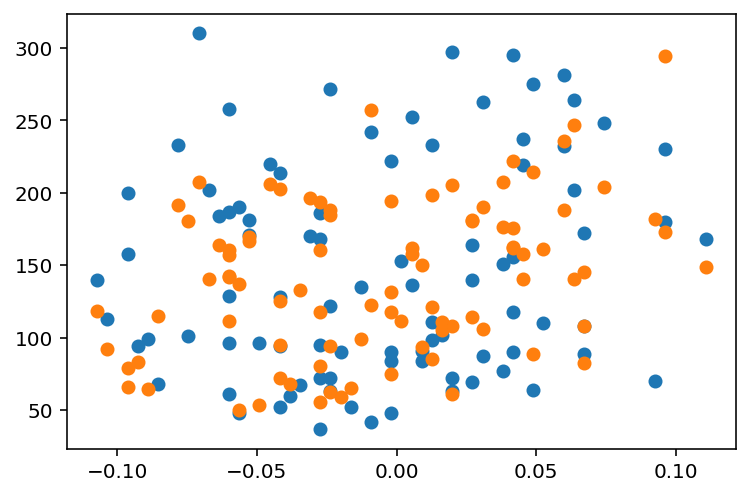

In [23]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## 마치며
뭔가 쉽지 않았다 데이터 분포가 여기저기 떨어져 있어서 loss값이 쉽게 안떨어 졌던 것 같다 다른 모델로 하면 괜찮을지

궁금하다
